<a href="https://colab.research.google.com/github/ujjwalkakade09/Prediction/blob/master/Predict_Stock_Prices_Using_Linear_Regression_and_Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# This Program is predecting Stock Prices Using Machine Learning Model called Linear Regression and Decision Tree Regressor.

In [0]:
# We will Install the dependencies which we are using.

import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor  #installing for Decision tree model in which we are using Decision Tree Regression.
from sklearn.linear_model import LinearRegression  #installing for linear model in which we are using LinearRegression.
from sklearn.model_selection import train_test_split  # Installing Model Selection to split our Data in Train and Test.
import matplotlib.pyplot as plt 
plt.style.use('bmh') # we are giving this plot clled style bmh using matplotlib function.

In [29]:
# Now we will Load the database which we got from the Historical Quotes from the Yahoo Finance website, in this we are using the Netflix companies 1 year data.

from google.colab import files
uploaded = files.upload()

Saving NFLX.csv to NFLX (1).csv


In [30]:
# Now we will Store the data into a data fram

df = pd.read_csv('NFLX.csv') # We will creat the variable and store the data in that varible.
df.head(6) # Now we wil have look on the first 6 rows data.


,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-05-30,350.549988,354.209991,348.299988,351.850006,351.850006,4008000
1,2019-05-31,347.220001,349.339996,342.920013,343.279999,343.279999,5023400
2,2019-06-03,343.559998,347.660004,332.649994,336.630005,336.630005,7849600
3,2019-06-04,345.000000,353.609985,343.250000,353.399994,353.399994,7891600
4,2019-06-05,354.380005,357.880005,348.709991,355.730011,355.730011,5020100
5,2019-06-06,354.839996,358.209991,352.089996,357.130005,357.130005,3710000


In [31]:

df.tail(6) #to Have look on last six coloms of the data.

,Date,Open,High,Low,Close,Adj Close,Volume
247,2020-05-21,448.559998,448.959991,430.250000,436.250000,436.250000,9117300
248,2020-05-22,437.000000,439.089996,427.179993,429.320007,429.320007,5422300
249,2020-05-26,427.769989,428.500000,413.140015,414.769989,414.769989,7881100
250,2020-05-27,410.380005,420.019989,397.859985,419.890015,419.890015,10446300
251,2020-05-28,417.239990,422.369995,411.500000,413.440002,413.440002,5655100
252,2020-05-29,417.459991,420.299988,411.850006,419.730011,419.730011,5254900


In [32]:
print(df.info()) #to get the information about the Data.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       253 non-null    object 
 1   Open       253 non-null    float64
 2   High       253 non-null    float64
 3   Low        253 non-null    float64
 4   Close      253 non-null    float64
 5   Adj Close  253 non-null    float64
 6   Volume     253 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 14.0+ KB
None


In [33]:
# We will get the number of trading days

df.shape # first value is number of training data set

(253, 7)

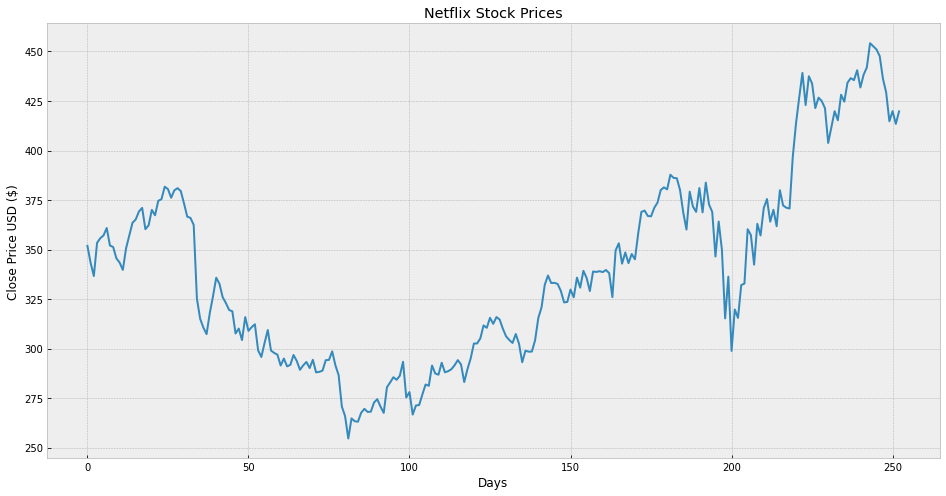

In [34]:
# Now we will Visualize the Close Price of the data

plt.figure(figsize=(16,8)) # we are giving the the size for the figure for plotting the data.
plt.title('Netflix Stock Prices') # we are giving the Title for the figure.
plt.xlabel('Days') #This will give lable to x axis.
plt.ylabel('Close Price USD ($)') #This will give lable to y axis.
plt.plot(df['Close']) # we are just printing Close Price.
plt.show()

In [35]:
# Now we will just get the Close price and store the data in the new variable.

df = df[['Close']]
df.head(5) # we will just have the first 5 rows of Close price data.

,Close
0,351.850006
1,343.279999
2,336.630005
3,353.399994
4,355.730011


In [36]:
# Now we will creat another varible to predict the 'x' days out into the future

future_days = 25

# now we will create a new column (target), target data is trying to predict prices with the guven datas it is shifted to 'x' units/days up

df['Prediction'] = df[['Close']].shift(-future_days)

df.head(5) # It will give the Close price and Prediction of first 5 rows.


,Close,Prediction
0,351.850006,380.549988
1,343.279999,376.160004
2,336.630005,379.929993
3,353.399994,381.000000
4,355.730011,379.500000


In [37]:
df.tail(5) # It will give the Close price and Prediction of last 5 rows. we can see the NaN values. in the prediction.

,Close,Prediction
248,429.320007,NaN
249,414.769989,NaN
250,419.890015,NaN
251,413.440002,NaN
252,419.730011,NaN


In [38]:
df.info() # As we are prediction 25 days values in the prediction column so it will give NaN value in last 25 values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Close       253 non-null    float64
 1   Prediction  228 non-null    float64
dtypes: float64(2)
memory usage: 4.1 KB


In [39]:
# We will create the feature data set (X) and we will convert it to a numpy array and we will remove the last 'x' rows/days.

X = np.array(df.drop(['Prediction'], 1))[:-future_days]

print(X)

[[351.850006]
 [343.279999]
 [336.630005]
 [353.399994]
 [355.730011]
 [357.130005]
 [360.869995]
 [352.01001 ]
 [351.269989]
 [345.559998]
 [343.429993]
 [339.730011]
 [350.619995]
 [357.119995]
 [363.519989]
 [365.209991]
 [369.209991]
 [371.040009]
 [360.299988]
 [362.200012]
 [370.019989]
 [367.320007]
 [374.600006]
 [375.429993]
 [381.720001]
 [380.549988]
 [376.160004]
 [379.929993]
 [381.      ]
 [379.5     ]
 [373.25    ]
 [366.600006]
 [365.98999 ]
 [362.440002]
 [325.209991]
 [315.100006]
 [310.619995]
 [307.299988]
 [317.940002]
 [326.459991]
 [335.779999]
 [332.700012]
 [325.929993]
 [322.98999 ]
 [319.5     ]
 [318.829987]
 [307.630005]
 [310.100006]
 [304.290009]
 [315.899994]
 [308.929993]
 [310.829987]
 [312.279999]
 [299.109985]
 [295.76001 ]
 [302.799988]
 [309.380005]
 [298.98999 ]
 [297.809998]
 [296.929993]
 [291.440002]
 [294.980011]
 [291.029999]
 [291.769989]
 [296.779999]
 [293.75    ]
 [289.290009]
 [291.519989]
 [293.25    ]
 [290.170013]
 [294.339996]
 [287.

In [40]:
# Now we will create the target data set (y) and we will convert it to a numpy array and we will get the all of the target values except the last 'x' rows/days.

Y = np.array(df['Prediction'])[:-future_days]

print(Y)

[380.549988 376.160004 379.929993 381.       379.5      373.25
 366.600006 365.98999  362.440002 325.209991 315.100006 310.619995
 307.299988 317.940002 326.459991 335.779999 332.700012 325.929993
 322.98999  319.5      318.829987 307.630005 310.100006 304.290009
 315.899994 308.929993 310.829987 312.279999 299.109985 295.76001
 302.799988 309.380005 298.98999  297.809998 296.929993 291.440002
 294.980011 291.029999 291.769989 296.779999 293.75     289.290009
 291.519989 293.25     290.170013 294.339996 287.98999  288.269989
 288.859985 294.149994 294.290009 298.600006 291.559998 286.600006
 270.75     265.920013 254.589996 264.75     263.309998 263.079987
 267.619995 269.579987 268.029999 268.149994 272.790009 274.459991
 270.720001 267.529999 280.480011 282.929993 285.529999 284.25
 286.279999 293.350006 275.299988 278.049988 266.690002 271.269989
 271.5      276.820007 281.859985 281.209991 291.450012 287.410004
 286.809998 292.859985 288.029999 288.589996 289.570007 291.570007
 294

In [0]:
# We will split the data into 75% training and 25% testing data.

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25)

In [0]:
# We have training and Testing dataset, we will create the models.

# First we will create the variable for the decision tree regressor model.

tree = DecisionTreeRegressor().fit(x_train, y_train) # we will train this model on the training dataset.

# Now we will create the variable for the Linear Regression model.

lr = LinearRegression().fit(x_train, y_train)  # we will train this model on the training dataset.

In [43]:
# Now we will get the last 'x' rows from the feature dataset and store it in new variable.

x_future = df.drop(['Prediction'], 1)[:-future_days] # and we will get the all columns except last x rows.

# In this we will get the last x days in this new varible.

x_future = x_future.tail(future_days)

# Now we willl covert dataset into numpy array.

x_future = np.array(x_future)

# we will print the future days

x_future

array([[332.029999],
       [332.829987],
       [360.269989],
       [357.320007],
       [342.390015],
       [362.98999 ],
       [357.119995],
       [370.959991],
       [375.5     ],
       [364.079987],
       [370.079987],
       [361.76001 ],
       [379.959991],
       [372.279999],
       [371.119995],
       [370.720001],
       [396.720001],
       [413.549988],
       [426.75    ],
       [439.170013],
       [422.959991],
       [437.48999 ],
       [433.829987],
       [421.420013],
       [426.700012]])

In [44]:
# Now we will show the model tree Predictions and Lineae Regression Prediction for the 'x' units/days, for that we will create the new varible and perform the operations.

tree_prediction = tree.predict(x_future) # using tree predict we are predicting the future values in new variable.

print(tree_prediction)

print() # just to give the gap

lr_prediction = lr.predict(x_future) # using the linear predict we are predicting the future values in new varibale.

print(lr_prediction)



[424.98999  358.       403.829987 411.890015 419.850006 415.269989
 373.044998 424.679993 434.26001  436.529999 435.549988 440.519989
 431.820007 438.269989 441.950012 454.190002 342.390015 413.440002
 447.670013 436.25     429.320007 436.25     419.890015 413.440002
 447.670013]

[339.34243226 339.95885804 361.102581   358.82949071 347.32527819
 363.19846086 358.67537271 369.33969559 372.8379713  364.03835128
 368.66161398 362.25070742 376.27458964 370.35681955 369.46298568
 369.15477279 389.18891116 402.15715302 412.32834021 421.89850402
 409.40797234 420.60397274 417.78378018 408.22135186 412.28982227]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


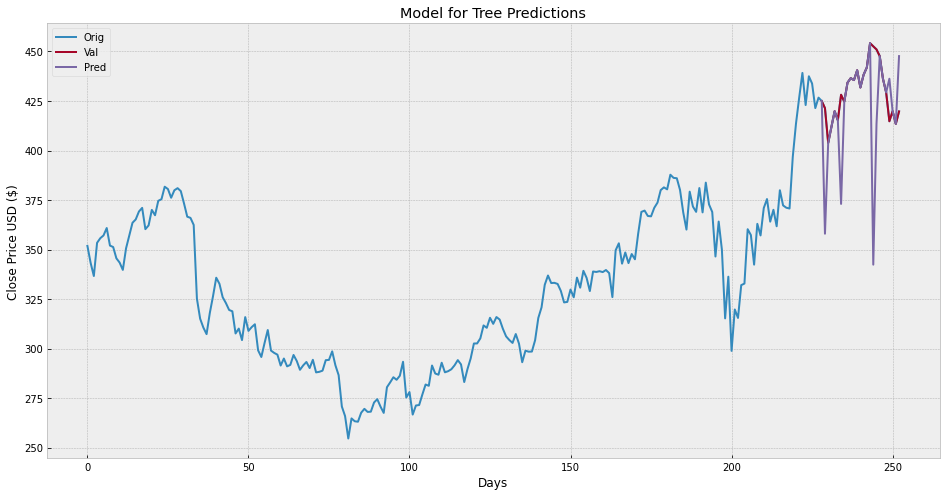

In [45]:
# We will the Predicted values on graph Decision Tree Model.

predictions = tree_prediction # This will give the predicted values.

valid = df[X.shape[0]:] # In this variable we will store the valid data. 

# we will create new column called valid

valid['Predictions'] = predictions

# Now will plot these vlues on graph.

plt.figure(figsize=(16,8))
plt.title('Model for Tree Predictions')
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(df['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Orig', 'Val', 'Pred'])
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


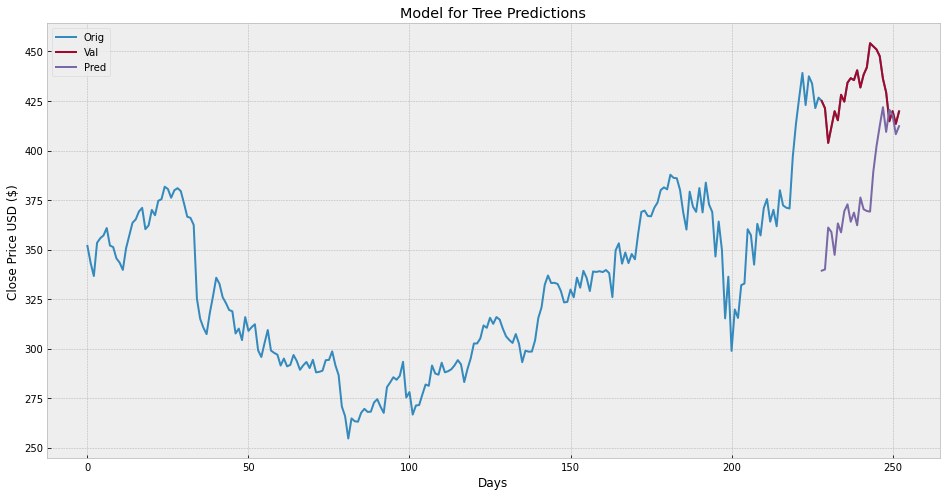

In [46]:
# We will the Predicted values on graph Linear Regression Model.

predictions = lr_prediction # This will give the predicted values.

valid = df[X.shape[0]:] # In this variable we will store the valid data. 

# we will create new column called valid

valid['Predictions'] = predictions

# Now will plot these vlues on graph.

plt.figure(figsize=(16,8))
plt.title('Model for Tree Predictions')
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(df['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Orig', 'Val', 'Pred'])
plt.show()